In [1]:
import sys; sys.path.append('..')
import os
import matplotlib.pyplot as plt
import pandas as pd
from dotenv import load_dotenv
load_dotenv()
src_dir = os.getenv('SRC_DIR')
assert(src_dir)
os.chdir(src_dir)
from plot_utils import hist, count, scatter

In [2]:
# basic data analysis - see https://www.kaggle.com/code/antoniosabatini/tiktok-popularity-track-eda-ml-models/notebook
# for info on audio features see https://developer.spotify.com/documentation/web-api/reference/get-audio-features

CSV_PATH = '../data/chartex_clean.csv'

df = pd.read_csv(CSV_PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4447 entries, 0 to 4446
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   track_name                    4446 non-null   object 
 1   track_pop                     4447 non-null   int64  
 2   artist                        4446 non-null   object 
 3   artist_pop                    4447 non-null   int64  
 4   album                         4446 non-null   object 
 5   length                        4447 non-null   int64  
 6   danceability                  4443 non-null   float64
 7   energy                        4443 non-null   float64
 8   key                           4443 non-null   float64
 9   loudness                      4443 non-null   float64
 10  mode                          4443 non-null   float64
 11  speechiness                   4443 non-null   float64
 12  acousticness                  4443 non-null   float64
 13  ins

In [3]:
# basic statistics
print(df.describe())

         track_pop   artist_pop        length  danceability       energy  \
count  4447.000000  4447.000000  4.447000e+03   4443.000000  4443.000000   
mean     40.054419    54.872273  2.012023e+05      0.685412     0.630271   
std      27.508927    21.983224  7.028332e+04      0.158217     0.198459   
min       0.000000     0.000000  0.000000e+00      0.000000     0.000000   
25%      11.000000    41.000000  1.623765e+05      0.587000     0.505000   
50%      45.000000    58.000000  1.975860e+05      0.710000     0.655000   
75%      63.000000    72.000000  2.305630e+05      0.802000     0.781000   
max      95.000000   100.000000  1.800000e+06      0.985000     1.000000   

               key     loudness         mode  speechiness  acousticness  \
count  4443.000000  4443.000000  4443.000000  4443.000000   4443.000000   
mean      5.274814    -7.077526     0.561332     0.109972      0.302627   
std       3.658899     3.826345     0.496280     0.112882      0.285298   
min       0.000

In [4]:
# Count the number of unique values in each column
print(df.nunique())
print(df.nunique()/len(df))

track_name                      3936
track_pop                         96
artist                          2932
artist_pop                        94
album                           3863
length                          3816
danceability                     706
energy                           856
key                               12
loudness                        3294
mode                               2
speechiness                     1070
acousticness                    1752
instrumentalness                1685
liveness                        1011
valence                          977
tempo                           3620
id                              4023
duration_ms                     3812
time_signature                     5
song_name                       3916
artist_name                     3300
total_likes_count               4444
number_of_videos                3128
number_of_videos_last_14days    2048
dtype: int64
track_name                      0.885091
track_pop            

## Distribution of the numerical and categorical columns

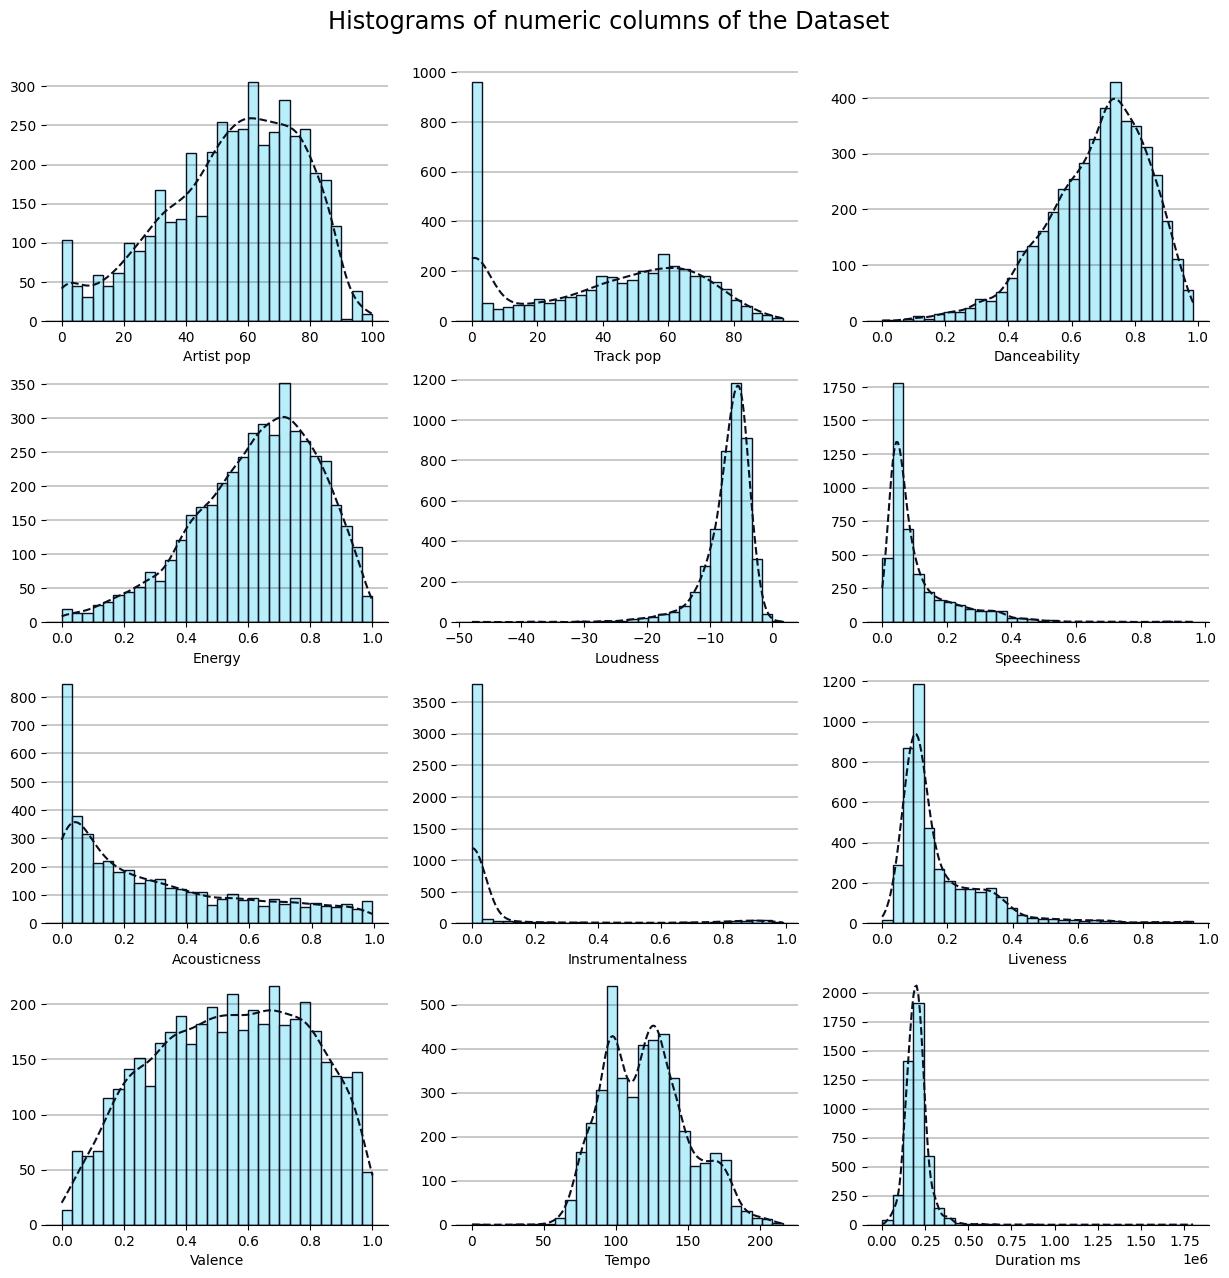

In [5]:
# distribution graphs for the numerical columns

cols = ['artist_pop', 'track_pop', 'danceability', 'energy', 
        'loudness', 'speechiness', 'acousticness', 'instrumentalness', 
        'liveness', 'valence', 'tempo', 'duration_ms']

fig, axs = plt.subplots(4, 3, figsize=(15, 15))

for i, col in enumerate(cols):
    
    row_index = i // 3
    col_index = i % 3
    
    hist(df, col, axs[row_index][col_index])

fig.suptitle("Histograms of numeric columns of the Dataset", fontsize="xx-large", y=0.92)
    
plt.show()

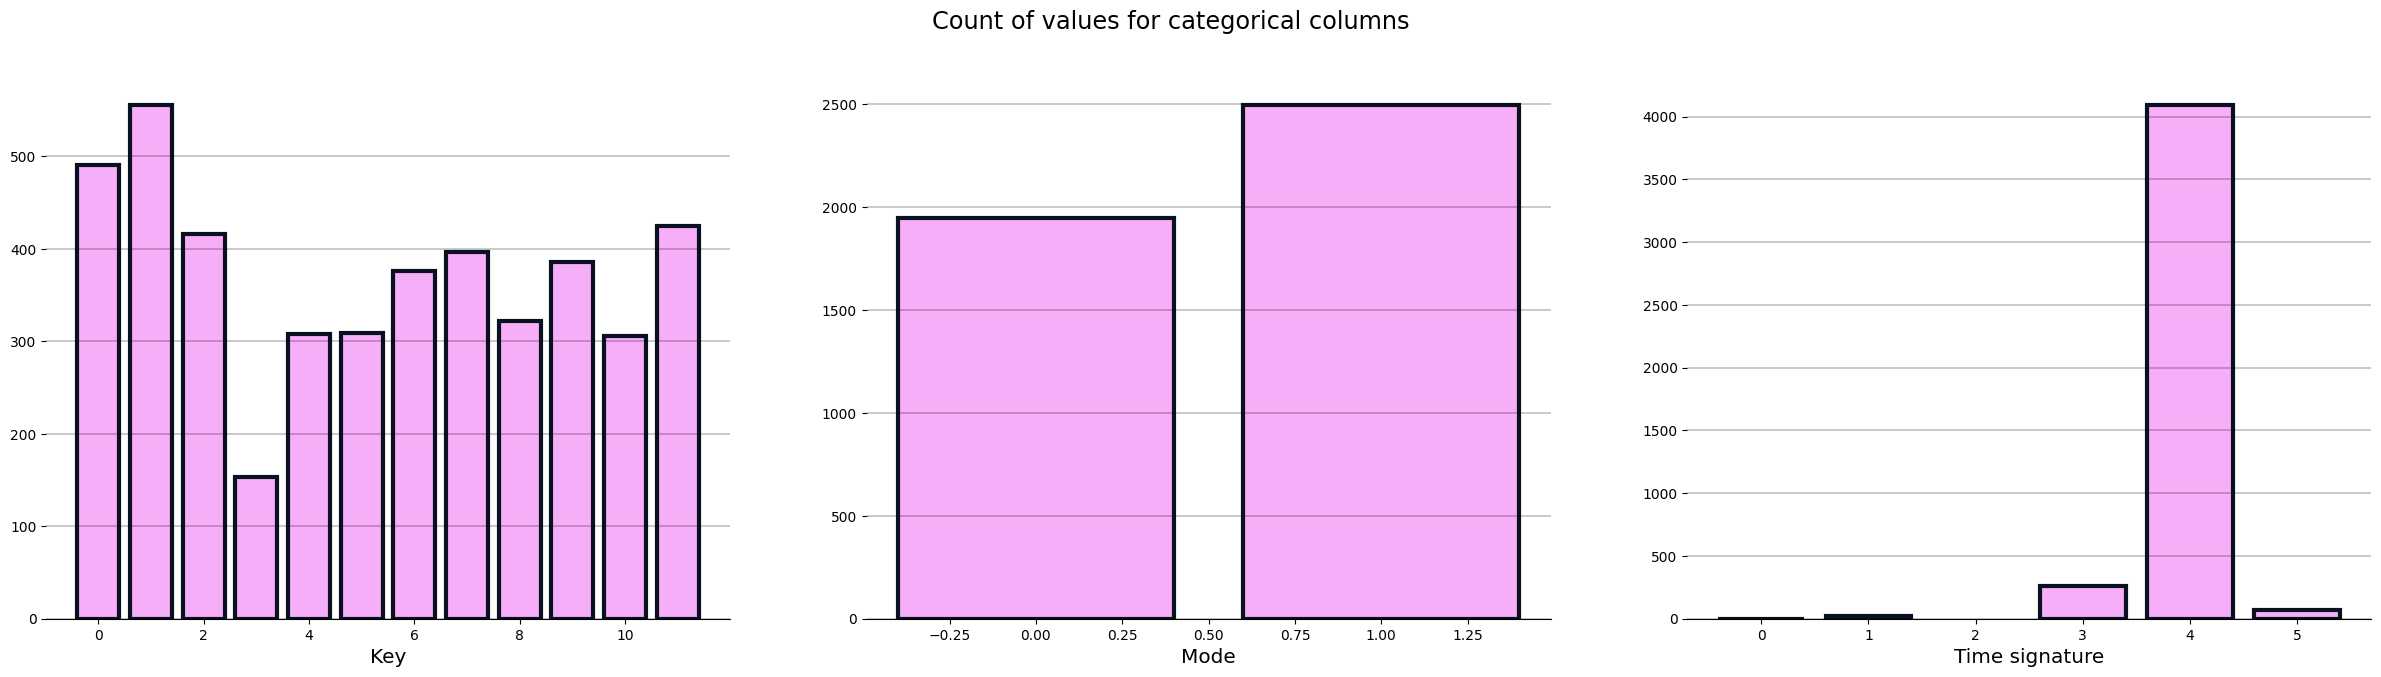

In [6]:
# distribution graphs for categorical columns

cols = ['key', 'mode', 'time_signature']

fig, ax = plt.subplots(1, 3, figsize=(30, 7))

for i, col in enumerate(cols):

    count(df, col, ax[i])
    
fig.suptitle("Count of values for categorical columns", size="xx-large")

plt.show()

We can see that for the most part, the songs from this dataset, which are all relatively popular on Tiktok (more than 100k videos) are:
- Energetic, high tempo, loud, and danceable
- Mainly music and not speech
- Under 5 minutes in length
- Recorded in a Studio (not live)
- Not entirely acoustic
- Overwhelmingly not instrumental (contain words)
- have 4/4 time signature

But are these features enough to distinguish the songs that go extremely viral from all the rest?
Of course extremely viral is subjective-for example we can use 10 million videos made as the threshold, or 1 million or 50 million.
For reference, the most popular song on tik tok has ~35 million videos.

## Correlation of number of tiktoks with spotify track popularity and spotify artist popularity


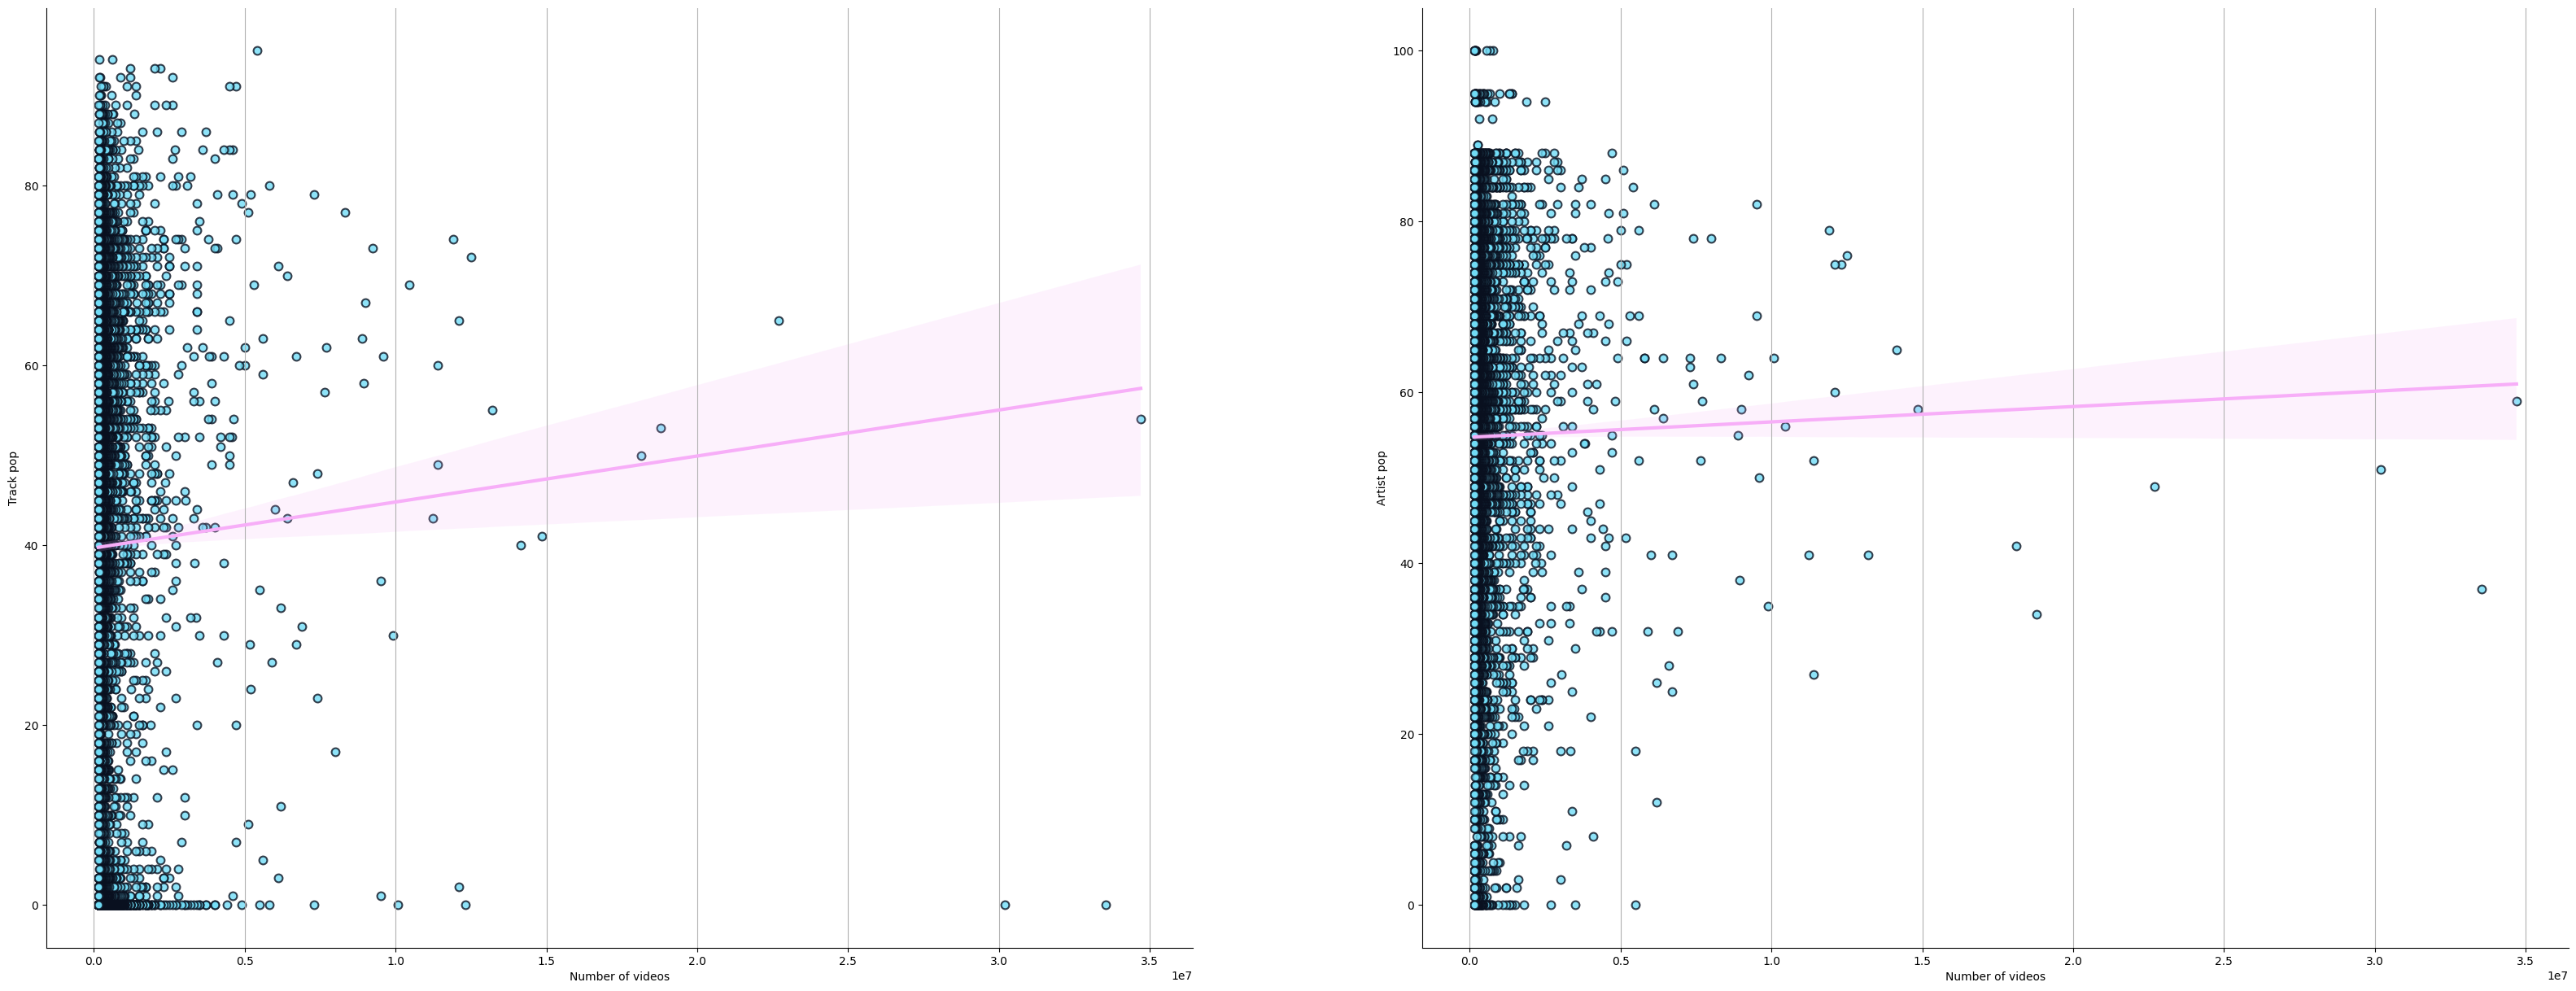

In [7]:
cols = ['track_pop', 'artist_pop']
fig, axs = plt.subplots(1,2,  figsize=(40, 15))

for i, col in enumerate(cols):
    
    col_index = i 
    
    ax = axs[col_index]
    
    scatter(df, 'number_of_videos', col, ax)
    

plt.show()
    

We can see that interestingly there is no strong correlation between popularity on spotify and popularity on tik tok.

## Correlation of audio features with tiktok popularity


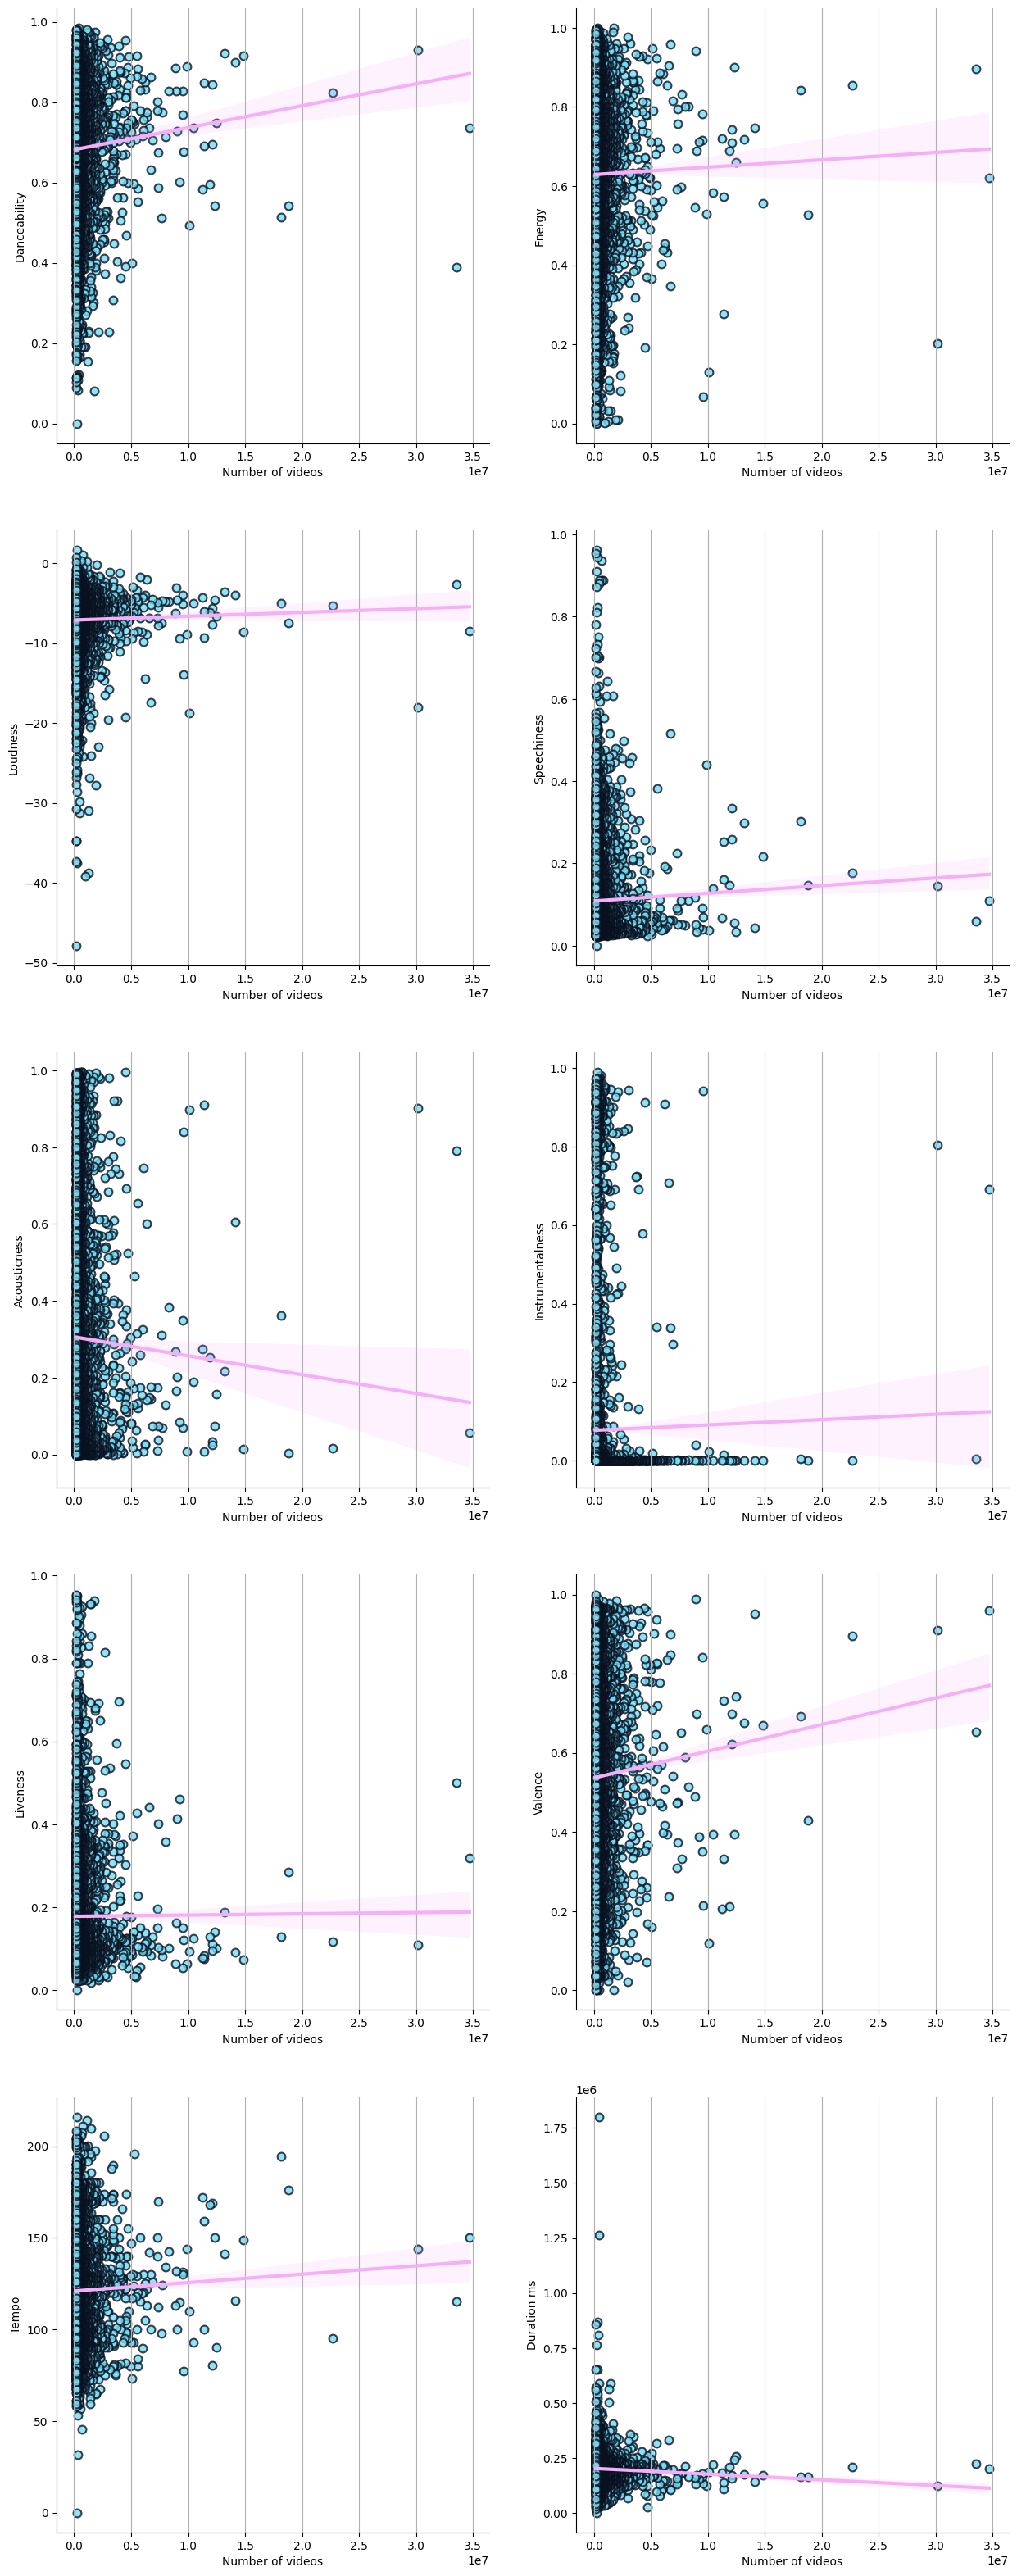

In [8]:
cols = ['danceability', 'energy', 'loudness', 'speechiness','acousticness',
        'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

fig, axs = plt.subplots(5, 2, figsize=(15, 40))

for i, col in enumerate(cols):
    
    row_index = i // 2
    col_index = i % 2
    
    ax = axs[row_index][col_index]
    
    scatter(df, 'number_of_videos', col, ax)
    

plt.show()
    

We can see that the correlations are rather weak and not enough to help distinguish viral songs from the rest.